In [1]:
import pandas as pd

In [2]:
df_teams = pd.read_csv('data/teams.csv')
df_games = pd.read_csv('data/games.csv')
df_players = pd.read_csv('data/players.csv')
df_games_detail = pd.read_csv('data/games_details.csv',low_memory = False)

In [3]:
df_teams = df_teams.loc[:,['TEAM_ID','ABBREVIATION','YEARFOUNDED','CITY','ARENA']]

In [4]:
df_games = df_games.loc[:,['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','PTS_home','AST_home','REB_home','TEAM_ID_away','PTS_away','AST_away','REB_away','HOME_TEAM_WINS']]

In [5]:
# 문제 없는 데이터프레임
df_games_detail_1 = df_games_detail.loc[:,:'START_POSITION']
# 문제 있는 데이터프레임 짜른 뒤 수정
df_games_detail_2 = df_games_detail.loc[:,'COMMENT':].shift(-1,axis= 1)
# 짜른 두 코드를 합쳤다.
df_games_detail = pd.concat([df_games_detail_1,df_games_detail_2],axis=1)

In [6]:
df_games_detail = df_games_detail.loc[:,['GAME_ID', 'TEAM_ID','PLAYER_ID','PLAYER_NAME','START_POSITION',
                       'COMMENT','MIN', 'FG_PCT', 'FG3_PCT', 
                       'DREB', 'REB', 'AST', 'STL', 'BLK','TO']]

In [8]:
rename ={ 'GAME_DATE_EST' : '경기날짜' ,'GAME_ID':'경기ID', 'HOME_TEAM_ID':'홈팀ID','PTS_home':'홈팀점수','AST_home':'홈팀어시','REB_home':'홈팀리바운드','TEAM_ID_away':'어웨이팀ID','PTS_away':'어웨이팀점수','AST_away':'어웨이팀어시','REB_away':'어웨이팀리바운드','HOME_TEAM_WINS':'홈팀승리여부'  }
df_games = df_games.rename(columns=rename)

rename_detail = { 'GAME_ID':'경기ID','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','PLAYER_NAME':'선수명',
                 'START_POSITION':'포지션',
 'COMMENT':'출전시간','MIN':'2점슛', 'FG_PCT':'3점슛', 'FG3_PCT':'자유투',
 'DREB':'리바운드','REB':'어시스트','AST':'가로채기','STL':'블락','TO':'턴오버수'}
df_games_detail = df_games_detail.rename(columns=rename_detail)
 
rename_playes = { 'PLAYER_NAME':'선수명','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','SEASON':'시즌' }
df_players=df_players.rename(columns=rename_playes)
 
rename_team = {'TEAM_ID':'팀ID','ABBREVIATION':'팀약어','YEARFOUNDED':'팀창설해',
              'CITY':'연고지','ARENA':'홈구장'}
df_teams = df_teams.rename(columns=rename_team)

In [9]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [10]:
df_games_detail.head()

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,BLK,턴오버수
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0


In [11]:
df_players.head()

,선수명,팀ID,선수ID,시즌
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [12]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [13]:
# 팀 정보에 필요한 데이터 분석

In [15]:
df_teams.iloc[:,1:].head()

,팀약어,팀창설해,연고지,홈구장
0,ATL,1949,Atlanta,State Farm Arena
1,BOS,1946,Boston,TD Garden
2,NOP,2002,New Orleans,Smoothie King Center
3,CHI,1966,Chicago,United Center
4,DAL,1980,Dallas,American Airlines Center


In [16]:
# 입력받은 정보만을 df로 출력

In [17]:
team_name = 'ATL'

In [19]:
df_teams.loc[df_teams['팀약어'] == team_name,:]

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena


In [20]:
df_teams['팀약어'].unique()

array(['ATL', 'BOS', 'NOP', 'CHI', 'DAL', 'DEN', 'HOU', 'LAC', 'LAL',
       'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX',
       'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET',
       'CHA', 'CLE', 'GSW'], dtype=object)

In [27]:
df_teams[df_teams['팀약어'] == 'ATL']['팀ID'].values[0]

1610612737

In [29]:
df_games[df_games['홈팀ID']==df_teams[df_teams['팀약어'] == 'ATL']['팀ID'].values[0]]

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
8,2022-03-11,22100996,1610612737,112.0,28.0,47.0,1610612746,106.0,22.0,36.0,1
68,2022-03-03,22100710,1610612737,130.0,26.0,33.0,1610612741,124.0,30.0,32.0,1
105,2022-02-26,22100906,1610612737,127.0,27.0,45.0,1610612761,100.0,25.0,42.0,1
143,2022-02-15,22100867,1610612737,124.0,25.0,35.0,1610612739,116.0,30.0,39.0,1
175,2022-02-11,22100841,1610612737,121.0,28.0,49.0,1610612759,136.0,37.0,41.0,0
...,...,...,...,...,...,...,...,...,...,...,...
25602,2014-11-08,21400084,1610612737,103.0,18.0,41.0,1610612752,96.0,26.0,44.0,1
25656,2014-11-01,21400032,1610612737,102.0,26.0,37.0,1610612754,92.0,25.0,44.0,1
25719,2014-10-20,11400089,1610612737,117.0,27.0,40.0,1610612766,114.0,31.0,52.0,1
25729,2014-10-18,11400077,1610612737,100.0,28.0,43.0,1610612765,104.0,28.0,47.0,0


In [30]:
import matplotlib.pyplot as plt

In [40]:
from datetime import datetime

In [46]:
df_games_analysis = df_games.loc[df_games['홈팀ID']==df_teams[df_teams['팀약어'] == 'ATL']['팀ID'].values[0],['경기날짜','홈팀점수','홈팀어시','홈팀리바운드','어웨이팀점수','어웨이팀어시','어웨이팀리바운드','홈팀승리여부']]

In [36]:
column_list = ['경기날짜','홈팀점수','홈팀어시','홈팀리바운드','어웨이팀점수','어웨이팀어시','어웨이팀리바운드','홈팀승리여부']

In [44]:
# 이 기간동안 넣은 평균 차트로 그리기

In [48]:
df_games_analysis.describe()

,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,855.000000
mean,102.397421,23.746776,42.543962,100.926143,22.309496,42.316530,0.566082
std,13.768213,5.205552,6.628789,13.879780,5.204987,6.674221,0.495904
min,59.000000,9.000000,23.000000,64.000000,7.000000,25.000000,0.000000
25%,93.000000,20.000000,38.000000,92.000000,19.000000,38.000000,0.000000
50%,102.000000,23.000000,42.000000,99.000000,22.000000,42.000000,1.000000
75%,111.000000,27.000000,47.000000,110.000000,26.000000,46.000000,1.000000
max,161.000000,42.000000,65.000000,168.000000,40.000000,71.000000,1.000000


In [52]:
df_games_analysis

,경기날짜,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
8,2022-03-11,112.0,28.0,47.0,106.0,22.0,36.0,1
68,2022-03-03,130.0,26.0,33.0,124.0,30.0,32.0,1
105,2022-02-26,127.0,27.0,45.0,100.0,25.0,42.0,1
143,2022-02-15,124.0,25.0,35.0,116.0,30.0,39.0,1
175,2022-02-11,121.0,28.0,49.0,136.0,37.0,41.0,0
...,...,...,...,...,...,...,...,...
25602,2014-11-08,103.0,18.0,41.0,96.0,26.0,44.0,1
25656,2014-11-01,102.0,26.0,37.0,92.0,25.0,44.0,1
25719,2014-10-20,117.0,27.0,40.0,114.0,31.0,52.0,1
25729,2014-10-18,100.0,28.0,43.0,104.0,28.0,47.0,0


In [59]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

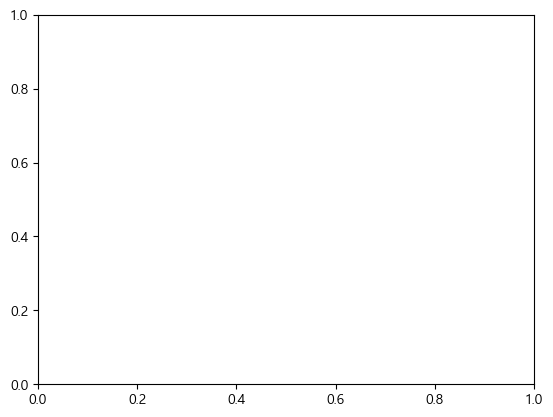

In [81]:
plt.plot(df_games_an